# Latar Belakang
Pakistan sebagian besar masih merupakan ekonomi informal berbasis uang tunai. Sebagian besar transaksi dilakukan secara tunai, kecuali untuk transaksi besar yang membutuhkan draf bank atau perintah pembayaran. Beberapa penelitian menunjukkan bahwa hingga 60 persen perekonomian bersifat informal, dengan mayoritas perusahaan lokal, terutama UKM, tidak berdokumen dan berada di luar jaringan pajak ([ITA](https://www.trade.gov/country-commercial-guides/pakistan-ecommerce)). Yang dimana dalam sektor jual beli barang pun mungkin masih menggunakan metode tradisional, maka dari itu pakistan sangat membutuhkan perusahaan yang merintis e-commerce.<br>
Electronic commerce atau e-commerce adalah seluruh kegiatan jual beli yang dilakukan lewat media elektronik. Sementara itu, dalam buku E-commerce: Implementasi, Strategi, dan Inovasinya, disebutkan bahwa e commerce adalah hasil teknologi informasi terhadap pertukarang barang, jasa, dan informasi lewat sistem elektronik seperti internet, televisi, dan jaringan komputer lainnya.


## Pernyataan Masalah
Dilaksanakanya analisis terhadap data set ini adalah untuk melihat potensi jual beli melalui platform e-commerce yang berada di negara pakistan pada tahun tersebut. Melihat aspek antara lain :
1. Analsisi Tehadap Data Metode Pembayaran.<br>
    a. Analisis metode pembayaran terpopuler yang digunakan penduduk Pakistan.<br>
    b. Korelasi antara metode pembayaran dengan jumlah pemesanan pertahunnya.<br>
2. Analsisi Tehadap Data Kategori barang.<br>
    a. Lima kategori barang yang terjual banyak.<br>
    b. Pembelian terbanyak pada tahun dan juga bulan.<br>
    c. Pemberian Diskon terbanyak di kategori barang.<br>
    



# Dataset
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset).

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')

In [304]:
df = pd.read_csv(r'I:\applications\Python\Purwadhika\Tugas\Capstone2\Pakistan Largest Ecommerce Dataset.csv')
# pd.set_option('display.max_columns', None)
df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataset ini berisi informasi terperinci dari setengah juta pesanan e-commerce di Pakistan dari Maret 2016 hingga Agustus 2018. Ada 14 kolom di dalam dataset hr_analytics, yaitu:  

1. item_id                  : ID unik untuk tiap kandidat
2. status                   : Kondisi barang selama pengiriman
3. created_at = Tanggal pemesanan barang
4. sku                      : Kode unik yang diberikan kepada setiap item
5. price                    : Harga barang
6. qty_ordered              : Jumlah barang yang di beli
7. grand_total              : Jumlah harga semua barang yang dibayar oleh customer
8. increment_id             : Kode struk transaksi
9. category_name_1          : Kategori barang yang di beli
10. sales_commission_code    : Kode komisi penjualan
11. discount_amount         : Jumlah potongan harga barang yang di beli
12. payment_method          : Methode pembayaran
13. Working Date            : Tanggal di kirim barang
14. BI Status               : Bisnis Income Status
15. MV                      : Hasil hitung perkalian antara **price** dan **qty_ordered**
16. Year                    : Tahun Pelanggan ketika bergabung
17. Month                   : Bulan Pelanggan ketika bergabung
18. Customer Since          : pengabungan waktu (tahun - bulan) pelanggan bergabung
19. M-Y                     : Data mengenai bulan dan tahun transaksi terjadi
20. FY                      : Thaiun fiskal perusahaan
21. Customer ID             : Nomor ID pelanggan yang memesan barang
22. Unnamed 21              : Kolom Kosong
23. Unnamed 22              : Kolom Kosong
24. Unnamed 23              : Kolom Kosong
25. Unnamed 24              : Kolom Kosong
26. Unnamed 25              : Kolom Kosong        


Berikut 5 baris teratas dan terbawah dari dataset Pakistan's Largest E-Commerce

## Data Understanding
Sebelum masuk ke dalam analisis, perlu adanya memahami karakteristik dan sifat dari data yang kita miliki. Hal ini meliputi pemahaman terhadap jenis data, jumlah dan tipe variabel, nilai-nilai yang hilang, dan kualitas data secara umum.<br>

Pertama, mari kita lihat informasi umum dari dataset Pakistan's Largest E-Commerce.

In [305]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.index
print(f'Range indexnya adalah {range(df.index.start, df.index.stop, df.index.step)}')
# display(df.info(all))
Dataset = []
for i in df.columns :
    Dataset.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((df[i].isna().sum()/len(df))*100,2).round(2).astype(str) + ' %',
        df[i].nunique(),
        df[i].count()
    ])
pd.DataFrame(data = Dataset,
            columns=[
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique',
                'Count'
            ])

Jumlah baris dan kolom di dataset df adalah (1048575, 26)
Range indexnya adalah range(0, 1048575)


,Features,DataType,Null,NullPercentage,Unique,Count
0,item_id,float64,464051,44.26 %,584524,584524
1,status,object,464066,44.26 %,16,584509
2,created_at,object,464051,44.26 %,789,584524
3,sku,object,464071,44.26 %,84889,584504
4,price,float64,464051,44.26 %,9121,584524
5,qty_ordered,float64,464051,44.26 %,74,584524
6,grand_total,float64,464051,44.26 %,36829,584524
7,increment_id,object,464051,44.26 %,408785,584524
8,category_name_1,object,464215,44.27 %,16,584360
9,sales_commission_code,object,601226,57.34 %,7226,447349


In [306]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,item_id,584524,"[211131.0, 211133.0, 211134.0, 211135.0, 211136.0, 211137.0, 211138.0, 211139.0, 211140.0, 211141.0, 211142.0, 211143.0, 211144.0, 211145.0, 211146.0, 211147.0, 211149.0, 211150.0, 211151.0, 211152.0, 211153.0, 211154.0, 211155.0, 211156.0, 211157.0, 211158.0, 211160.0, 211162.0, 211163.0, 211164.0, 211166.0, 211168.0, 211169.0, 211170.0, 211171.0, 211172.0, 211173.0, 211174.0, 211175.0, 211176.0, 211177.0, 211179.0, 211180.0, 211182.0, 211184.0, 211185.0, 211186.0, 211187.0, 211188.0, 211189.0, 211190.0, 211191.0, 211192.0, 211193.0, 211194.0, 211196.0, 211197.0, 211198.0, 211199.0, 211200.0, 211202.0, 211201.0, 211203.0, 211204.0, 211205.0, 211206.0, 211207.0, 211208.0, 211209.0, 211211.0, 211212.0, 211213.0, 211214.0, 211215.0, 211217.0, 211218.0, 211219.0, 211220.0, 211221.0, 211222.0, 211223.0, 211225.0, 211224.0, 211226.0, 211227.0, 211228.0, 211229.0, 211230.0, 211231.0, 211232.0, 211233.0, 211234.0, 211235.0, 211236.0, 211237.0, 211238.0, 211239.0, 211240.0, 211241.0, 211242.0, ...]"
1,status,16,"[complete, canceled, order_refunded, received, refund, closed, fraud, holded, exchange, pending_paypal, paid, \N, cod, pending, nan, processing, payment_review]"
2,created_at,789,"[7/1/2016, 7/2/2016, 7/3/2016, 7/4/2016, 7/5/2016, 7/6/2016, 7/7/2016, 7/8/2016, 7/9/2016, 7/10/2016, 7/11/2016, 7/12/2016, 7/13/2016, 7/14/2016, 7/15/2016, 7/16/2016, 7/17/2016, 7/18/2016, 7/19/2016, 7/20/2016, 7/21/2016, 7/22/2016, 7/23/2016, 7/24/2016, 7/25/2016, 7/26/2016, 7/27/2016, 7/28/2016, 7/29/2016, 7/30/2016, 7/31/2016, 8/1/2016, 8/2/2016, 8/3/2016, 8/4/2016, 8/5/2016, 8/6/2016, 8/7/2016, 8/8/2016, 8/9/2016, 8/10/2016, 8/11/2016, 8/12/2016, 8/13/2016, 8/14/2016, 8/15/2016, 8/16/2016, 8/17/2016, 8/18/2016, 8/19/2016, 8/20/2016, 8/21/2016, 8/22/2016, 8/23/2016, 8/24/2016, 8/25/2016, 8/26/2016, 8/27/2016, 8/28/2016, 8/29/2016, 8/30/2016, 8/31/2016, 9/1/2016, 9/2/2016, 9/3/2016, 9/4/2016, 9/5/2016, 9/6/2016, 9/7/2016, 9/8/2016, 9/9/2016, 9/10/2016, 9/11/2016, 9/12/2016, 9/13/2016, 9/14/2016, 9/15/2016, 9/16/2016, 9/17/2016, 9/18/2016, 9/19/2016, 9/20/2016, 9/21/2016, 9/22/2016, 9/23/2016, 9/24/2016, 9/25/2016, 9/26/2016, 9/27/2016, 9/28/2016, 9/29/2016, 9/30/2016, 10/1/2016, 10/2/2016, 10/3/2016, 10/4/2016, 10/5/2016, 10/6/2016, 10/7/2016, 10/8/2016, ...]"
3,sku,84889,"[kreations_YI 06-L, kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free, Ego_UP0017-999-MR0, kcc_krone deal, BK7010400AG, UK_Namkino All In One 200 Gms, UK_Namkino Mix Nimco 400 Gms, Apple iPhone 6S 64GB, GFC_Pedestal Myga Cross Base (Special Guard) 24"", BK1070200PL, BK1130200CF, kcc_Sultanat, kcc_glamour deal, Assetmen_MD-346-M, cr_DATES WITH CASHEW-400 GM, UK_Gift Box Mix Dry Fruit Sweets 500 Gms, itter_AB 1199, RL_B005, bed&rest_S7, L&L_LLHLE8224S, J&J_JJR-4, J&J_JJR-20, D Lend a Helping Hand, Mochika_M0001112-12, Mochika_M0001112-8, SKMT_Blood Test, SKMT_Medicine, sputnik_701/5-11, Ctees-Black Zip- Up Hoodie-XL, Samsung Galaxy J5, Veet_4, RS_Gulab jaman Tin, cr_PEANUT SALTY-200 GM, Oriflame_21557, JBS_TAT-128, Ajmery_BRR-590-M, HOS_GUCFW75, Lexon_LL116B-Blue, kcc_Fantasy Perfumed Talcum Powder-200gm, 2Zee_SC6, Q MOBILE Noir X20, rehaab_RJ160047, Farah_3-B, RS_Sohan Halwa Tin, UK_Soan Papdi Original 250 Gms, UK_Gift Box Soghaat 500 Gms, RS_Double Delight, Al Muhafiz Sohan Halwa Almond, UK_Gift Box Baklawa 500 Gms, sputnik_2146/6-8, kkc_Kingtox 450ml Classic Green All Insect Killer Spray, Al Muhafiz Sohan Halwa Walnut, RS_Honey Dry Fruit Halwa, itter_AB 1214, Eco Star_40U557, Orient_OR-6057 GX LGFD LV, HOS_JPGCW100, kkc_Jasmine King Air Freshener, asimjofaeanew_5A, ajmery_F9-981, hijabh_JILBAB-C (1)-52x, noritake_NTM163M, RS_Habshi Halwa Tin, sentiments_WRK1612, bata_comfit-8613714-43-9, UK_Namkino Mix Nimco 8 Pcs Gift Pack, Inoxy_Inoxy Hair Miracle Elixir, RS_Chum Chum Tin, Dany_AUK-650 , urban_ PT004-L, jackpot_JP-7999, UK_Gift Box Pistachio Delight 500 Gms, test_tcsconnect, sst_Lyquin-Regular fit-Large, 

In [307]:
pd.set_option('display.max_columns', None)
display(df.head(),df.tail())


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing
Pada tahapan ini data akan diolah menjadi format yang lebih mudah dan efektif untuk diproses menjadi data yang dapat dianalisis. Tahapan yang akan dilakukan dalam data Preprocessing adalah data cleaning, data integration, data transformation dan data reduction.<br>
## Data Cleaning
Data cleaning atau membersihkan data merupakan langkah awal dalam data preprocessing. Tujuan dari data cleaning ini adalah untuk menyeleksi data dan membuang data yang dapat menganggu analisis data. Pada tahap ini, kita harus mengatasi data yang bermasalah.
## Data integration
Data integration atau integrasi data adalah tahap untuk menggabungkan data dari berbagai sumber menjadi satu kesatuan data yang lebih besar. Saat menggabungkan data tersebut, kamu harus mengecek dan memastikan bahwa data yang datang dari berbagai sumber itu punya format yang sama.
## Data transformation
Langkah berikutnya setelah melakukan data integration adalah data transformation. Langkah ini dilakukan agar data yang sudah terkumpul dari berbagai sumber tersebut menjadi seragam. Dalam data transformation, kamu bisa mengubah struktur data, format data, atau nilai data sedemikian rupa sehingga menghasilkan dataset yang sesuai.
## Data reduction
Langkah terakhir dalam data preprocessing adalah data reduction atau pengurangan data. Langkah ini bertujuan untuk mengurangi jumlah sampel data yang diambil.

### Menghapus data Duplikasi
data yang mengalami perulangan akan dihapus supaya tidak ada anomali yang menggangu proses analisis

In [308]:
# Menghitung jumlah data yang duplikasi
print(f"Jumlah data dupliaksi {df.duplicated().sum()}")

Jumlah data dupliaksi 464050


In [309]:
# Menghapus data dupliasi
df = df.drop_duplicates()

In [310]:
print(f"Jumlah data dupliaksi {df.duplicated().sum()}")

Jumlah data dupliaksi 0


### Menghitung nilai data missing setelah menghapus data duplikasi
Missing value adalah tipe data yang tidak ada isinya, oleh karenanya kita dapat mengisinya atau menghapus missing value dari data tersebut

<Axes: >

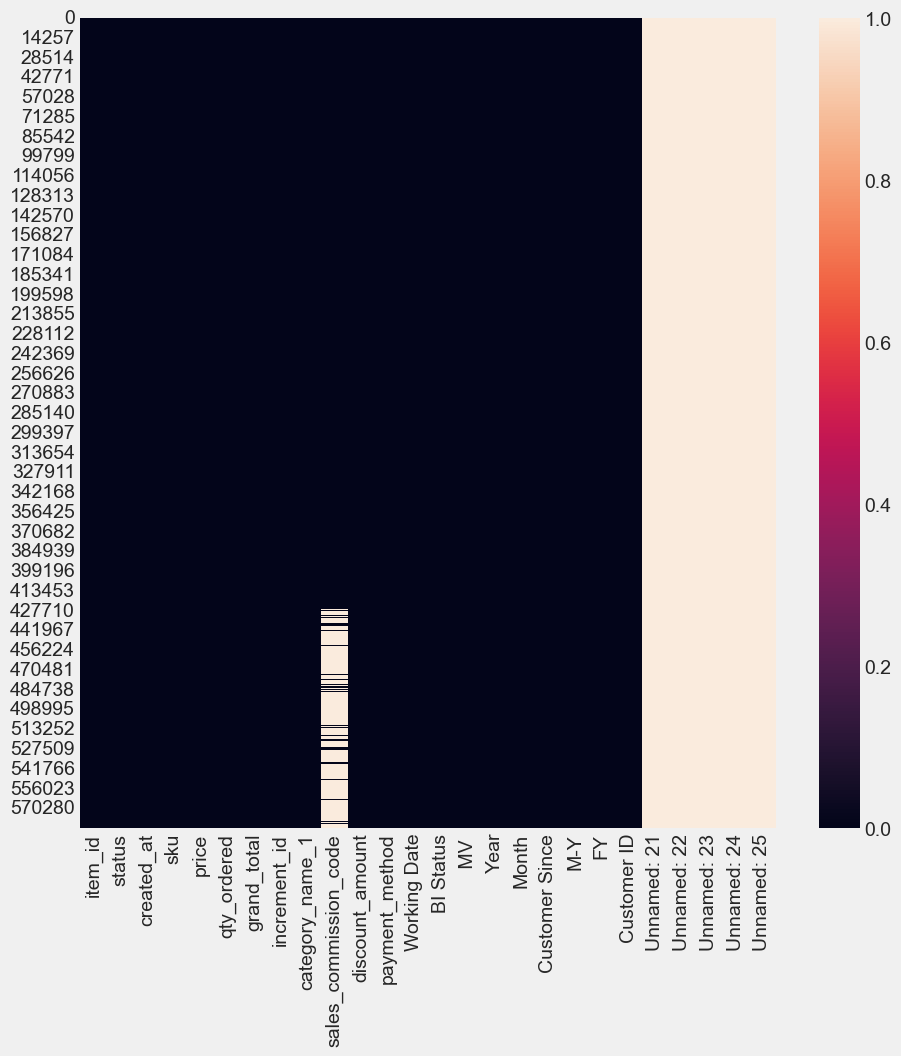

In [311]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

In [312]:
df.isna().sum()

item_id                  1     
status                   16    
created_at               1     
sku                      21    
price                    1     
qty_ordered              1     
grand_total              1     
increment_id             1     
category_name_1          165   
sales_commission_code    137176
discount_amount          1     
payment_method           1     
Working Date             1     
BI Status                1     
 MV                      1     
Year                     1     
Month                    1     
Customer Since           12    
M-Y                      1     
FY                       1     
Customer ID              12    
Unnamed: 21              584525
Unnamed: 22              584525
Unnamed: 23              584525
Unnamed: 24              584525
Unnamed: 25              584525
dtype: int64

In [313]:
round(df.isna().sum()/df.shape[0]*100, 2)

item_id                  0.00  
status                   0.00  
created_at               0.00  
sku                      0.00  
price                    0.00  
qty_ordered              0.00  
grand_total              0.00  
increment_id             0.00  
category_name_1          0.03  
sales_commission_code    23.47 
discount_amount          0.00  
payment_method           0.00  
Working Date             0.00  
BI Status                0.00  
 MV                      0.00  
Year                     0.00  
Month                    0.00  
Customer Since           0.00  
M-Y                      0.00  
FY                       0.00  
Customer ID              0.00  
Unnamed: 21              100.00
Unnamed: 22              100.00
Unnamed: 23              100.00
Unnamed: 24              100.00
Unnamed: 25              100.00
dtype: float64

Melihat dari data, persentasi dan juga heatmap nilai data missing terdapat pada kolom `sales_commission_code`, `Unnamed :21`, `Unnamed :22`, `Unnamed :23`, `Unnamed :24` dan `Unnamed :25`.

In [314]:
df = df.dropna(subset=['item_id'])

### Menghapus satu data yang null pada item_id.

In [315]:
df.isna().sum()

item_id                  0     
status                   15    
created_at               0     
sku                      20    
price                    0     
qty_ordered              0     
grand_total              0     
increment_id             0     
category_name_1          164   
sales_commission_code    137175
discount_amount          0     
payment_method           0     
Working Date             0     
BI Status                0     
 MV                      0     
Year                     0     
Month                    0     
Customer Since           11    
M-Y                      0     
FY                       0     
Customer ID              11    
Unnamed: 21              584524
Unnamed: 22              584524
Unnamed: 23              584524
Unnamed: 24              584524
Unnamed: 25              584524
dtype: int64

### Menghapus kolom yang sekitarnya tidak diperlukan
Pada tahapan ini ada beberapa kolom yang menurut saya perlu dihilangkankan karena pada analisis nanti tidak diperlukan

In [316]:
df.drop(columns=['sales_commission_code','Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis = 1, inplace=True)

### Pengecekan Outlier
Tahapana ini bertujuan untuk melihat apakah ada nili-nilai yang salah atau anomali

In [317]:
def Cek_Outliers(df, col):
    q1 = df[col].describe()['25%']
    q3 = df[col].describe()['75%']
    iqr = q3 - q1
    upper_fence = q3 + (1.5*iqr)
    lower_fence = q1 - (1.5*iqr)
    df_new_outliers = df[(df[col] < lower_fence) | (df[col] > upper_fence)]
    if len(df_new_outliers) == 0:
        return "No Outliers"
    else:
        return df_new_outliers

In [318]:
df_outlier_price = Cek_Outliers(df,'price')
df_outlier_price 

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
8,211140.0,canceled,7/1/2016,Apple iPhone 6S 64GB,96499.0,1.0,96499.0,100147451,Mobiles & Tablets,0.0,ublcreditcard,7/1/2016,Gross,"96,499",2016.0,7.0,2016-7,7-2016,FY17,8.0
9,211141.0,canceled,7/1/2016,Apple iPhone 6S 64GB,96499.0,1.0,96499.0,100147452,Mobiles & Tablets,0.0,mygateway,7/1/2016,Gross,"96,499",2016.0,7.0,2016-7,7-2016,FY17,8.0
31,211168.0,complete,7/1/2016,Samsung Galaxy J5,20999.0,1.0,20999.0,100147466,Mobiles & Tablets,0.0,cod,7/1/2016,Net,"20,999",2016.0,7.0,2016-7,7-2016,FY17,20.0
60,211202.0,order_refunded,7/1/2016,Eco Star_40U557,30417.0,1.0,30417.0,100147486,Entertainment,0.0,cod,7/1/2016,Valid,"30,417",2016.0,7.0,2016-7,7-2016,FY17,36.0
63,211204.0,complete,7/1/2016,Orient_OR-6057 GX LGFD LV,45250.0,1.0,45250.0,100147488,Appliances,0.0,cod,7/1/2016,Net,"45,250",2016.0,7.0,2016-7,7-2016,FY17,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584497,905179.0,paid,8/28/2018,APPCHA5AF14939B8F8A,44199.0,1.0,44499.0,100562365,Appliances,0.0,Easypay,8/28/2018,Valid,"44,199",2018.0,8.0,2018-8,8-2018,FY19,115323.0
584520,905205.0,processing,8/28/2018,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,0.0,bankalfalah,8/28/2018,Gross,"35,599",2018.0,8.0,2018-8,8-2018,FY19,115326.0
584521,905206.0,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,0.0,bankalfalah,8/28/2018,Gross,"259,998",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584522,905207.0,processing,8/28/2018,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,0.0,bankalfalah,8/28/2018,Gross,"174,600",2018.0,8.0,2018-7,8-2018,FY19,113474.0


Penemuan Outlier ini jika dilihat datanya maka akan sangat wajar penemuan ini karena, barang yang dijual memang harganya tinggi di pasaran.

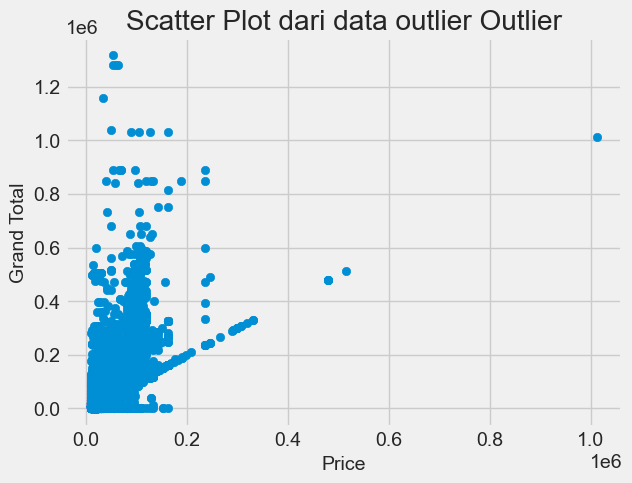

In [319]:
plt.scatter(df_outlier_price['price'], df_outlier_price['grand_total'])
plt.xlabel('Price')
plt.ylabel('Grand Total')
plt.title('Scatter Plot dari data outlier Outlier')
plt.show()

Melihat dari hasil scatter plot terdapat Outlier multivariat. Terdapat outlier yang lebih dari satu variabel berada di luar nilai 0.6 pada `grand_total` dan juga nilai 0.2 pada `price` sehingga kemungkinan nilai tersebut adalah outlier.

### Penemuan nilai anomali di dalam kolom `grand_total`

saya mencurigai nilai grand total itu ada beberapa yang tidak sesuai. Maka dari itu saya menampilkan beberapa data duplikat yang ada di `Customer ID`

In [320]:
# Menandai data yang memiliki duplikat pada kolom 'nama_kolom'
dup_data = df.duplicated(subset=['Customer ID'], keep=False)

# Menampilkan data yang memiliki nilai duplikat pada kolom 'nama_kolom'
dup_values = df.loc[dup_data, 'Customer ID']
print(dup_values)

1         2.0     
2         3.0     
3         4.0     
5         6.0     
6         7.0     
         ...      
584518    115325.0
584519    115320.0
584521    113474.0
584522    113474.0
584523    113474.0
Name: Customer ID, Length: 534125, dtype: float64


In [321]:
df.loc[df['Customer ID'] ==113474.0][['item_id','Customer ID','price','qty_ordered','discount_amount','status','grand_total','category_name_1']].head()

,item_id,Customer ID,price,qty_ordered,discount_amount,status,grand_total,category_name_1
570323,889188.0,113474.0,89499.0,1.0,0.0,canceled,89799.0,Mobiles & Tablets
571670,890658.0,113474.0,41999.0,2.0,0.0,canceled,84298.0,Mobiles & Tablets
571671,890659.0,113474.0,41999.0,1.0,0.0,canceled,42299.0,Mobiles & Tablets
572557,891679.0,113474.0,97999.0,2.0,0.0,canceled,196298.0,Mobiles & Tablets
572559,891681.0,113474.0,97999.0,1.0,0.0,canceled,98299.0,Mobiles & Tablets


Pada kolom `item_id` dengan nomor `890659.0` menunjukan data tersebut anomali, dengan daftar diatas menandakan bahwa perhitungan grand total masih salah atau tidak sesuai dengan perhitungan perkalian antara `price` dengan `qty_ordered` dan pengurangan `discount_amount`.

### Menghapus kolom `grand_total`
karena perhitunganya salah akan saya hapus dan nantinya akan saya gantikan dengan yang baru

In [322]:
df[df['grand_total'] < 0]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
209940,473144.0,complete,5/19/2017,lalassc_SSP-07A,1200.0,1.0,-10.0,100306233,Women's Fashion,300.0000,Payaxis,5/19/2017,Net,"1,200",2017.0,5.0,2016-11,5-2017,FY17,15714.0
242331,510950.0,received,6/12/2017,SN_Muzadati-500gm,170.0,1.0,-6.4,100324785,Soghaat,74.8095,Easypay,6/12/2017,Valid,170,2017.0,6.0,2016-7,6-2017,FY17,967.0
242332,510951.0,received,6/12/2017,Nimcos_Namak-Paray-200gm,98.0,2.0,-6.4,100324785,Soghaat,86.2510,Easypay,6/12/2017,Valid,196,2017.0,6.0,2016-7,6-2017,FY17,967.0
242333,510952.0,received,6/12/2017,Nimcos_Crunchy-Mix-400gm,216.0,1.0,-6.4,100324785,Soghaat,95.0521,Easypay,6/12/2017,Valid,216,2017.0,6.0,2016-7,6-2017,FY17,967.0
242334,510953.0,received,6/12/2017,RS_Sohan Halwa 1000gm,660.0,1.0,-6.4,100324785,Soghaat,290.4370,Easypay,6/12/2017,Valid,660,2017.0,6.0,2016-7,6-2017,FY17,967.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571270,890219.0,complete,7/27/2018,MEFOXF5B39EF5CC541E-M,420.0,1.0,-340.6,100553654,Men's Fashion,612.6000,bankalfalah,7/27/2018,Net,420,2018.0,7.0,2016-8,7-2018,FY19,3732.0
571271,890221.0,complete,7/27/2018,VIT5AC4A6E65D6C6,180.0,1.0,-340.6,100553654,Superstore,612.6000,bankalfalah,7/27/2018,Net,180,2018.0,7.0,2016-8,7-2018,FY19,3732.0
571272,890222.0,complete,7/27/2018,HIJ5B2204D154E0F,450.0,1.0,-340.6,100553654,Superstore,612.6000,bankalfalah,7/27/2018,Net,450,2018.0,7.0,2016-8,7-2018,FY19,3732.0
571273,890223.0,complete,7/27/2018,HASQAR5A53699375950,98.0,4.0,-340.6,100553654,Health & Sports,612.6000,bankalfalah,7/27/2018,Net,392,2018.0,7.0,2016-8,7-2018,FY19,3732.0


In [323]:
df.loc[df['Customer ID'] ==113474.0][['item_id','Customer ID','price','qty_ordered','discount_amount','status','grand_total','category_name_1']].head()

,item_id,Customer ID,price,qty_ordered,discount_amount,status,grand_total,category_name_1
570323,889188.0,113474.0,89499.0,1.0,0.0,canceled,89799.0,Mobiles & Tablets
571670,890658.0,113474.0,41999.0,2.0,0.0,canceled,84298.0,Mobiles & Tablets
571671,890659.0,113474.0,41999.0,1.0,0.0,canceled,42299.0,Mobiles & Tablets
572557,891679.0,113474.0,97999.0,2.0,0.0,canceled,196298.0,Mobiles & Tablets
572559,891681.0,113474.0,97999.0,1.0,0.0,canceled,98299.0,Mobiles & Tablets


In [324]:
df.drop(columns=['grand_total'], axis = 1, inplace=True)

### Merubah format kolom `created_at`
Disini kolom `created_at` yang awalnya dengan format month-day-year akan diubah menjadi format day-month-year

In [325]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['created_at'] = df['created_at'].dt.strftime('%d/%m/%Y')

### Merubah value rusak 
Beberapa value yang akan dibenarkan atau dihilangkan antara lain seperti `\\N`, `#REF!`, minus, dll


In [326]:
value_r = (df == '\\N').any()
columns_N = df.columns[value_r].tolist()
print("Kolom yang memiliki nilai \\N:", columns_N)

Kolom yang memiliki nilai \N: ['status', 'category_name_1']


1. Pada variable `value_r` menampilkan dataset dengan nilai `\\N` akan di cek apakah ada menggunakan fungsi `any()`.<br>
2. Pada variable `colums_N` akan menampilkan nama-nama kolom yang didalamnya ada nilai `\\N` dan ditampilkan berupa list.<br>
3. terakhir mencetak data yang dipanggil fungsi sebelumnya.

In [327]:
#menampilkan kolom yang ada nilai #REF!
ref_rows = df[df.eq('#REF!').any(axis=1)]
ref_columns = df.columns[df.isin(['#REF!']).any()]
print("Kolom yang memiliki nilai #REF!: ", ref_columns.tolist())

Kolom yang memiliki nilai #REF!:  ['BI Status']


1. df.eq('#REF!').any(axis=1) digunakan untuk mencari baris-baris yang memiliki nilai '#REF!' pada dataframe df
2. df.columns[df.isin(['#REF!']).any()] digunakan untuk melakukan indexing pada kolom-kolom yang memiliki nilai '#REF!' pada dataframe df
3. .tolist() digunakan untuk mengubah hasil indexing kolom menjadi list

In [328]:
df_price_minus = df[df['price'] < 0]
df_discount_minus = df[df['discount_amount'] < 0]
print("kolom 'price' memiliki value minus sebanyak:", df_price_minus.shape[0])
print("kolom 'discount_amount' memiliki value minus sebanyak:", df_discount_minus.shape[0])

kolom 'price' memiliki value minus sebanyak: 0
kolom 'discount_amount' memiliki value minus sebanyak: 3


### Mengubah data `Bi Status`, `category_name_1` dan `discount_amount`
1. Pada kolom `BI Status` yang nilai datanya `#REF!` akan diubah ke `Valid`
2. Pada kolom `category_name_1` dam `status`yang nilai datanya `\\N` akan diubah ke `NaN`
3. Pada kolom `discount_amount` yang nilainya minus akan dihapus

In [329]:
df['BI Status'] = df['BI Status'].replace('#REF!', 'Valid')
df['category_name_1']= df['category_name_1'].replace('\\N',np.nan)
df['status']= df['status'].replace('\\N',np.nan)
df = df.loc[df['discount_amount'] >= 0].reset_index(drop=True)


In [330]:
value_r = (df == '\\N').any()
columns_N = df.columns[value_r].tolist()
print("Kolom yang memiliki nilai \\N:", columns_N)

Kolom yang memiliki nilai \N: []


In [331]:
df_price_minus = df[df['price'] < 0]
df_discount_minus = df[df['discount_amount'] < 0]
print("kolom 'price' memiliki value minus sebanyak:", df_price_minus.shape[0])
print("kolom 'discount_amount' memiliki value minus sebanyak:", df_discount_minus.shape[0])

kolom 'price' memiliki value minus sebanyak: 0
kolom 'discount_amount' memiliki value minus sebanyak: 0


### Mengitung ulang aritmatika pada kolom `grand_total`
Pertama membuat kolom baru `new_grand_total` dengan cara aritmatika perkalian antara `price` dengan `qty_ordered` dan pengurangan `discount_amount`. Setelah itu akan dilakukan 

In [332]:
df['new_grand_total'] = (df['price'] * df['qty_ordered']) - df['discount_amount']

In [333]:
df[df['new_grand_total'] < 0]

,item_id,status,created_at,sku,price,qty_ordered,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,new_grand_total
155304,407448.0,complete,20/02/2017,Nimcos_Mix-Nimco-200gm,110.0,1.0,100271403,Soghaat,200.3750,Payaxis,2/20/2017,Net,110,2017.0,2.0,2016-11,2-2017,FY17,26790.0,-90.3750
155508,407718.0,complete,21/02/2017,Aladdin_Hand Grip Pair - Black,269.0,1.0,100271572,Health & Sports,381.3000,Payaxis,2/21/2017,Net,269,2017.0,2.0,2017-2,2-2017,FY17,34446.0,-112.3000
155645,407892.0,complete,21/02/2017,sg_KajalPencil0.36g,100.0,1.0,100271675,Beauty & Grooming,138.2367,Payaxis,2/21/2017,Net,100,2017.0,2.0,2016-11,2-2017,FY17,26620.0,-38.2367
158365,411348.0,complete,27/02/2017,tram_TT23080083,55.0,2.0,100273658,Home & Living,203.3000,Payaxis,2/27/2017,Net,110,2017.0,2.0,2016-11,2-2017,FY17,26413.0,-93.3000
159972,413387.0,complete,02/03/2017,swi_LTLP,10.0,1.0,100274724,School & Education,133.5833,Payaxis,3/2/2017,Net,10,2017.0,3.0,2016-11,3-2017,FY17,27151.0,-123.5833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584411,905090.0,order_refunded,27/08/2018,MATMY5A4A253C8A5C2,48.0,2.0,100562305,Mobiles & Tablets,299.9900,cod,8/27/2018,Valid,96,2018.0,8.0,2017-11,8-2018,FY19,69407.0,-203.9900
584412,905091.0,order_refunded,27/08/2018,MATBIZ5A702C575969E,145.0,1.0,100562305,Mobiles & Tablets,299.9900,cod,8/27/2018,Valid,145,2018.0,8.0,2017-11,8-2018,FY19,69407.0,-154.9900
584413,905092.0,order_refunded,27/08/2018,MEFEZI5B7169B92D153,275.0,1.0,100562305,Men's Fashion,299.9900,cod,8/27/2018,Valid,275,2018.0,8.0,2017-11,8-2018,FY19,69407.0,-24.9900
584414,905093.0,order_refunded,27/08/2018,HASQAR5A618CC063535,189.0,1.0,100562305,Health & Sports,299.9900,cod,8/27/2018,Valid,189,2018.0,8.0,2017-11,8-2018,FY19,69407.0,-110.9900


Pada `new_grand_total` yang nilainya minus tidak perlu dihapus karena diasumsikan penjual ingin menjual habis barang tersebut.

### Menghapus data kosong `Customer ID`
1. Karena data yang kosong pada `Customer ID` hanya 11 data perlu kurangi karena tidak aakn mempengaruhi analisis.
2. 

In [334]:
df = df.dropna(subset=['Customer ID'])
# df = df.dropna(subset=['category_name_1'])
# df = df.dropna(subset=['sku'])
# df = df.dropna(subset=['status'])

In [335]:
df.isna().sum()

item_id            0   
status             19  
created_at         0   
sku                20  
price              0   
qty_ordered        0   
increment_id       0   
category_name_1    8013
discount_amount    0   
payment_method     0   
Working Date       0   
BI Status          0   
 MV                0   
Year               0   
Month              0   
Customer Since     0   
M-Y                0   
FY                 0   
Customer ID        0   
new_grand_total    0   
dtype: int64

walaupun `status`, `sku` dan `category_name_1` ada data yang kosong tetapi dengan nilai yang tidak melebihi 10 ribu tida

### Merapikan kolom `payment_method`

In [336]:
print('berikut adalah banyaknya value di dalam kolom payment_method')
df['payment_method'].value_counts()

berikut adalah banyaknya value di dalam kolom payment_method


cod                  271955
Payaxis              97637 
Easypay              82896 
jazzwallet           35145 
easypay_voucher      31176 
bankalfalah          23065 
jazzvoucher          15633 
Easypay_MA           14027 
customercredit       7555  
apg                  1758  
ublcreditcard        882   
cashatdoorstep       732   
mcblite              723   
mygateway            669   
internetbanking      472   
productcredit        125   
marketingexpense     45    
financesettlement    15    
Name: payment_method, dtype: int64

Jika melihat values dari kolom di atas bahwa pada dasarnya value-value tersebut memiliki kesamaan. saya akan mengkategorikannya menjadi 5 kelompok sehingga akan lebih memudahkan untuk dianalisis.

1. `Cash on Delivery (COD)`: Metode pembayaran ini melibatkan pembayaran yang dilakukan secara tunai pada saat pengiriman.

2. `Mobile Wallet`: Kategori ini mencakup metode pembayaran seperti jazzwallet, Payaxis, dan Easypay yang merupakan dompet digital berbasis seluler.

3. `Banking`: Kategori ini mencakup metode pembayaran seperti bankalfalah, internetbanking, productcredit, yang melibatkan transaksi melalui bank.

4. `Voucher`: Kategori ini mencakup metode pembayaran seperti Easypay_MA, easypay_voucher, dan jazzvoucher yang merupakan sistem voucher prabayar.

5. `Other`: Kategori ini mencakup metode seperti kredit pelanggan, apg, kartu kredit ubl, mygateway, mcblite, dan lainnya. Merupakan metode pembayaran yang jarang digunakan.

In [337]:
def categorize_payment_method(method):
    if method in ['cod', 'cashatdoorstep']:
        return 'COD'
    elif method in ['jazzwallet', 'Easypay', 'Payaxis']:
        return 'Mobile Wallet'
    elif method in ['bankalfalah', 'internetbanking', 'productcredit']:
        return 'Banking'
    elif method in ['Easypay_MA', 'jazzvoucher','easypay_voucher']:
        return 'Vouchers'
    else:
        return 'Other payment methods'
df['payment_method_category'] = df['payment_method'].apply(lambda x: categorize_payment_method(x))

In [338]:
df['payment_method'].value_counts()

cod                  271955
Payaxis              97637 
Easypay              82896 
jazzwallet           35145 
easypay_voucher      31176 
bankalfalah          23065 
jazzvoucher          15633 
Easypay_MA           14027 
customercredit       7555  
apg                  1758  
ublcreditcard        882   
cashatdoorstep       732   
mcblite              723   
mygateway            669   
internetbanking      472   
productcredit        125   
marketingexpense     45    
financesettlement    15    
Name: payment_method, dtype: int64

### Merapikan kolom `status`

In [339]:
df['status'].value_counts()

complete          233685
canceled          201242
received          77289 
order_refunded    59523 
refund            8050  
cod               2859  
paid              1159  
closed            494   
payment_review    57    
pending           48    
processing        33    
holded            31    
fraud             10    
pending_paypal    7     
exchange          4     
Name: status, dtype: int64

Jika melihat values dari kolom di atas bahwa pada dasarnya value-value tersebut memiliki kesamaan. saya akan mengkategorikannya menjadi 4 kelompok sehingga akan lebih memudahkan untuk dianalisis.

1. `Complete`: Metode pembayaran ini melibatkan pembayaran yang dilakukan secara tunai pada saat pengiriman.

2. `pending`: Kategori ini mencakup metode pembayaran seperti jazzwallet, Payaxis, dan Easypay yang merupakan dompet digital berbasis seluler.

3. `refund`: Kategori ini mencakup metode pembayaran seperti bankalfalah, internetbanking, productcredit, yang melibatkan transaksi melalui bank.

4. `Voucher`: Kategori ini mencakup metode pembayaran seperti Easypay_MA, easypay_voucher, dan jazzvoucher yang merupakan sistem voucher prabayar.

In [340]:
def status_categorized(method):
    if method in ['complete', 'received', 'exchange','paid']:
        return 'complete'
    elif method in ['cod', 'payment_review', 'pending','processing', 'holded', 'pending_paypal', 'processing' ]:
        return 'pending'
    elif method in ['refund', 'order_refunded']:
        return 'refund'
    elif method in ['canceled','closed', 'fraud']:
        return 'canceled'
df['status_categorized'] = df['status'].apply(lambda x: status_categorized(x))

In [341]:
df['status'].value_counts()

complete          233685
canceled          201242
received          77289 
order_refunded    59523 
refund            8050  
cod               2859  
paid              1159  
closed            494   
payment_review    57    
pending           48    
processing        33    
holded            31    
fraud             10    
pending_paypal    7     
exchange          4     
Name: status, dtype: int64

### Pengecekan
sebelum di export data di cek sekali lagi

In [342]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,item_id,584510,"[211131.0, 211133.0, 211134.0, 211135.0, 211136.0, 211137.0, 211138.0, 211139.0, 211140.0, 211141.0, 211142.0, 211143.0, 211144.0, 211145.0, 211146.0, 211147.0, 211149.0, 211150.0, 211151.0, 211152.0, 211153.0, 211154.0, 211155.0, 211156.0, 211157.0, 211158.0, 211160.0, 211162.0, 211163.0, 211164.0, 211166.0, 211168.0, 211169.0, 211170.0, 211171.0, 211172.0, 211173.0, 211174.0, 211175.0, 211176.0, 211177.0, 211179.0, 211180.0, 211182.0, 211184.0, 211185.0, 211186.0, 211187.0, 211188.0, 211189.0, 211190.0, 211191.0, 211192.0, 211193.0, 211194.0, 211196.0, 211197.0, 211198.0, 211199.0, 211200.0, 211202.0, 211201.0, 211203.0, 211204.0, 211205.0, 211206.0, 211207.0, 211208.0, 211209.0, 211211.0, 211212.0, 211213.0, 211214.0, 211215.0, 211217.0, 211218.0, 211219.0, 211220.0, 211221.0, 211222.0, 211223.0, 211225.0, 211224.0, 211226.0, 211227.0, 211228.0, 211229.0, 211230.0, 211231.0, 211232.0, 211233.0, 211234.0, 211235.0, 211236.0, 211237.0, 211238.0, 211239.0, 211240.0, 211241.0, 211242.0, ...]"
1,status,15,"[complete, canceled, order_refunded, received, refund, closed, fraud, holded, exchange, pending_paypal, paid, nan, cod, pending, processing, payment_review]"
2,created_at,789,"[01/07/2016, 02/07/2016, 03/07/2016, 04/07/2016, 05/07/2016, 06/07/2016, 07/07/2016, 08/07/2016, 09/07/2016, 10/07/2016, 11/07/2016, 12/07/2016, 13/07/2016, 14/07/2016, 15/07/2016, 16/07/2016, 17/07/2016, 18/07/2016, 19/07/2016, 20/07/2016, 21/07/2016, 22/07/2016, 23/07/2016, 24/07/2016, 25/07/2016, 26/07/2016, 27/07/2016, 28/07/2016, 29/07/2016, 30/07/2016, 31/07/2016, 01/08/2016, 02/08/2016, 03/08/2016, 04/08/2016, 05/08/2016, 06/08/2016, 07/08/2016, 08/08/2016, 09/08/2016, 10/08/2016, 11/08/2016, 12/08/2016, 13/08/2016, 14/08/2016, 15/08/2016, 16/08/2016, 17/08/2016, 18/08/2016, 19/08/2016, 20/08/2016, 21/08/2016, 22/08/2016, 23/08/2016, 24/08/2016, 25/08/2016, 26/08/2016, 27/08/2016, 28/08/2016, 29/08/2016, 30/08/2016, 31/08/2016, 01/09/2016, 02/09/2016, 03/09/2016, 04/09/2016, 05/09/2016, 06/09/2016, 07/09/2016, 08/09/2016, 09/09/2016, 10/09/2016, 11/09/2016, 12/09/2016, 13/09/2016, 14/09/2016, 15/09/2016, 16/09/2016, 17/09/2016, 18/09/2016, 19/09/2016, 20/09/2016, 21/09/2016, 22/09/2016, 23/09/2016, 24/09/2016, 25/09/2016, 26/09/2016, 27/09/2016, 28/09/2016, 29/09/2016, 30/09/2016, 01/10/2016, 02/10/2016, 03/10/2016, 04/10/2016, 05/10/2016, 06/10/2016, 07/10/2016, 08/10/2016, ...]"
3,sku,84888,"[kreations_YI 06-L, kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free, Ego_UP0017-999-MR0, kcc_krone deal, BK7010400AG, UK_Namkino All In One 200 Gms, UK_Namkino Mix Nimco 400 Gms, Apple iPhone 6S 64GB, GFC_Pedestal Myga Cross Base (Special Guard) 24"", BK1070200PL, BK1130200CF, kcc_Sultanat, kcc_glamour deal, Assetmen_MD-346-M, cr_DATES WITH CASHEW-400 GM, UK_Gift Box Mix Dry Fruit Sweets 500 Gms, itter_AB 1199, RL_B005, bed&rest_S7, L&L_LLHLE8224S, J&J_JJR-4, J&J_JJR-20, D Lend a Helping Hand, Mochika_M0001112-12, Mochika_M0001112-8, SKMT_Blood Test, SKMT_Medicine, sputnik_701/5-11, Ctees-Black Zip- Up Hoodie-XL, Samsung Galaxy J5, Veet_4, RS_Gulab jaman Tin, cr_PEANUT SALTY-200 GM, Oriflame_21557, JBS_TAT-128, Ajmery_BRR-590-M, HOS_GUCFW75, Lexon_LL116B-Blue, kcc_Fantasy Perfumed Talcum Powder-200gm, 2Zee_SC6, Q MOBILE Noir X20, rehaab_RJ160047, Farah_3-B, RS_Sohan Halwa Tin, UK_Soan Papdi Original 250 Gms, UK_Gift Box Soghaat 500 Gms, RS_Double Delight, Al Muhafiz Sohan Halwa Almond, UK_Gift Box Baklawa 500 Gms, sputnik_2146/6-8, kkc_Kingtox 450ml Classic Green All Insect Killer Spray, Al Muhafiz Sohan Halwa Walnut, RS_Honey Dry Fruit Halwa, itter_AB 1214, Eco Star_40U557, Orient_OR-6057 GX LGFD LV, HOS_JPGCW100, kkc_Jasmine King Air Freshener, asimjofaeanew_5A, ajmery_F9-981, hijabh_JILBAB-C (1)-52x, noritake_NTM163M, RS_Habshi Halwa Tin, sentiments_WRK1612, bata_comfit-8613714-43-9, UK_Namkino Mix Nimco 8 Pcs Gift Pack, Inoxy_Inoxy Hair Miracle Elixir, RS_Chum Chum Tin, Dany_AUK-65

### Merubah Kolom yang belum baik supaya diperbaiki

In [343]:
df.rename(columns={'item_id':'Item ID'},inplace=True)
df.rename(columns={'status_categorized':'Status Categorized'},inplace=True)
df.rename(columns={'status':'Status'},inplace=True)
df.rename(columns={'created_at':'Created At'},inplace=True)
df.rename(columns={'sku':'SKU'},inplace=True)
df.rename(columns={'price':'Price'},inplace=True)
df.rename(columns={'qty_ordered':'Qty Ordered'},inplace=True)
df.rename(columns={'increment_id':'Increment ID'},inplace=True)
df.rename(columns={' MV':'MV'},inplace=True)
df.rename(columns={'category_name_1':'Category'},inplace=True)
df.rename(columns={'discount_amount':'Discount Amount'},inplace=True)
df.rename(columns={'payment_method':'Payment Method'},inplace=True)
df.rename(columns={'payment_method_category':'Payment Method Category'},inplace=True)
df.rename(columns={'new_grand_total':'Grand Total'},inplace=True)


In [344]:
df.head()

,Item ID,Status,Created At,SKU,Price,Qty Ordered,Increment ID,Category,Discount Amount,Payment Method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Grand Total,Payment Method Category,Status Categorized
0,211131.0,complete,01/07/2016,kreations_YI 06-L,1950.0,1.0,100147443,Women's Fashion,0.0,cod,7/1/2016,Valid,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,1950.0,COD,complete
1,211133.0,canceled,01/07/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.0,1.0,100147444,Beauty & Grooming,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,240.0,COD,canceled
2,211134.0,canceled,01/07/2016,Ego_UP0017-999-MR0,2450.0,1.0,100147445,Women's Fashion,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,2450.0,COD,canceled
3,211135.0,complete,01/07/2016,kcc_krone deal,360.0,1.0,100147446,Beauty & Grooming,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,60.0,COD,complete
4,211136.0,order_refunded,01/07/2016,BK7010400AG,555.0,2.0,100147447,Soghaat,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,1110.0,COD,refund


# Menyimpan data untuk di export ke excel

In [345]:
import time

start_time = time.time()

# Export data ke Excel
df.to_excel('Pakistan_largest_Ecomerce_Dataset_Clean_Wafa.xlsx', index=False)

end_time = time.time()

print(f"Total waktu yang dibutuhkan: {end_time - start_time} detik")

Total waktu yang dibutuhkan: 581.5953283309937 detik


# Analisis Statistika
Analisa data statistika deskriptif untuk data numerikal terbagi menjadi 2 yaitu pengukuran tendency sentral dan pengukuran variability

### Pengukuran Tendency Sentral
Dilakukan untuk mengetahui mean, median, dan modus dari data numerikal

In [346]:
df.describe().T[['mean' , '50%']]

,mean,50%
Item ID,565663.959640,568418.5
Price,6348.841234,899.0
Qty Ordered,1.296368,1.0
Discount Amount,499.505771,0.0
Year,2017.044097,2017.0
Month,7.167773,7.0
Customer ID,45790.744300,42856.0
Grand Total,6677.854549,937.5


Dengan fungsi `describe()` digunakan untuk menghitung statistik deskriptif dari sebuah DataFrame. Dengan fungsi ini dapat memberikan inforamasi berupa rata-rata(`mean`) dan nilai tengah(`median/50%`)

In [347]:
modus_price = df['Price'].mode()[0]
modus_qty_ordered =df['Qty Ordered'].mode()[0]
modus_grand_total =df['Grand Total'].mode()[0]
modus_discount_amount =df['Discount Amount'].mode()[0]
print('Besarnya modus dari data')
print('-'*50)
print('modus_price :', modus_price)
print('modus_qty_ordered :', modus_qty_ordered)
print('modus_grand_total:', modus_grand_total)
print('modus_discount_amount:', modus_discount_amount)

Besarnya modus dari data
--------------------------------------------------
modus_price : 1000.0
modus_qty_ordered : 1.0
modus_grand_total: 999.0
modus_discount_amount: 0.0


Pada 

### Pengukuran Variabilitas
Dilakukan untuk mengetahui range data, standar deviasi, dan IQR dari data numerikal

In [348]:
range_price = df['Price'].max()-df['Price'].min()
range_qty_ordered =df['Qty Ordered'].max()-df['Qty Ordered'].min()
range_grand_total =df['Grand Total'].max()-df['Grand Total'].min()
range_discount_amount =df['Discount Amount'].max()-df['Discount Amount'].min()
# membuat dataframe range
df_range = pd.DataFrame({'Range_Price': range_price, 
                        'Range_Qty_Ordered': range_qty_ordered, 
                        'Range_Grand_Total': range_grand_total, 
                        'Range_Discount_Amount': range_discount_amount}, index = [0])
df_range

,Range_Price,Range_Qty_Ordered,Range_Grand_Total,Range_Discount_Amount
0,1012625.9,999.0,8959410.0,90300.0


## Distribusi normal atau tidaknya kolom `price` dan `grand_total_new`

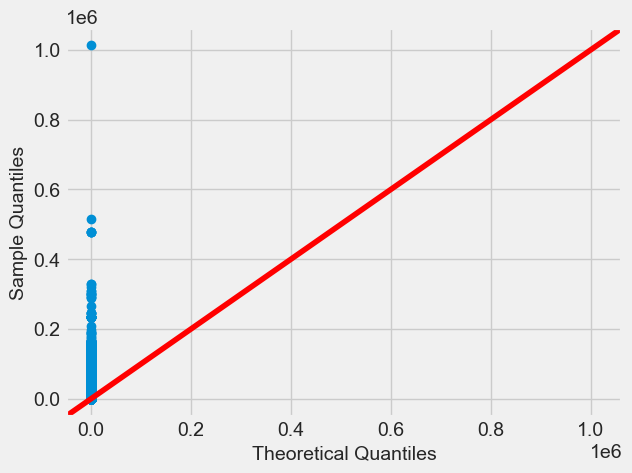

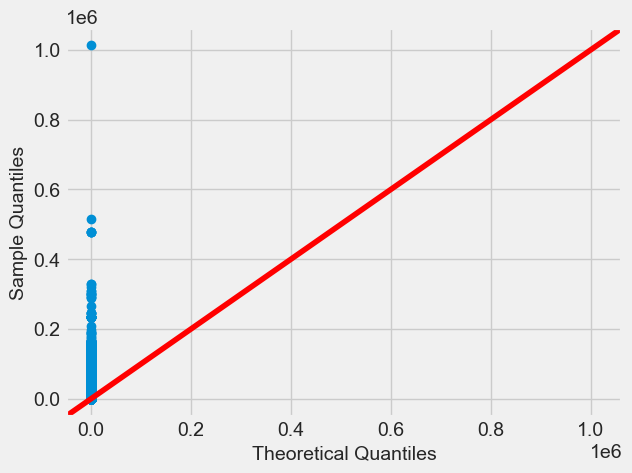

In [349]:
import statsmodels.api as sm
sm.qqplot(df['Price'],line='45')

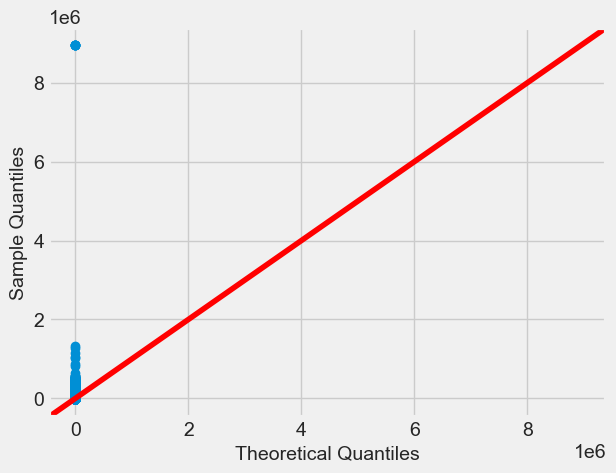

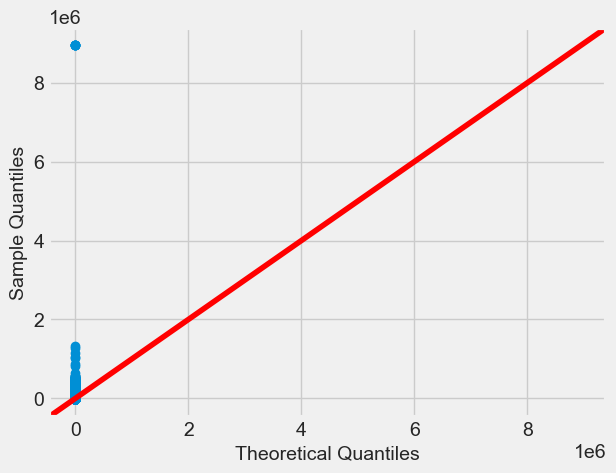

In [350]:
import statsmodels.api as sm
sm.qqplot(df['Grand Total'],line='45')

secara umum menentukan apakah suatu data terdistribusi normal atau tidak dalam menggunakan Q-Q Plot dapat memperhatikan 3 hal :
1. Apakah titik-titik pada grafik membentuk garis lurus atau tidak?
2. Apakah titik-titik tersebut berada di sekitar garis diagonal atau tidak?
3. Apakah titik-titik tersebut berada di antara kedua garis horizontal yang digambar pada grafik atau tidak?

berdasarkan dari pertanyaan diatas kita bisa menyimpulkan bahwa dari gambar diatas datanya `tidak terdistribusi normal`.

In [351]:
from scipy.stats import normaltest
stats, pval= normaltest(df['Price'])
if pval>0.05:
    print('distribusi normal')
else:
    print('distribusi data tidak normal')

distribusi data tidak normal


In [352]:
# grouping data per kategori
category_group = df.groupby('Category')
category_sales = category_group['Grand Total'].mean()
category_sales

Category
Appliances            10650.800191
Beauty & Grooming     857.407557  
Books                 519.235699  
Computing             10797.122528
Entertainment         18158.547295
Health & Sports       1035.739259 
Home & Living         996.646024  
Kids & Baby           559.645465  
Men's Fashion         879.546576  
Mobiles & Tablets     18854.797172
Others                5675.956552 
School & Education    399.815449  
Soghaat               350.473218  
Superstore            707.059732  
Women's Fashion       1666.412841 
Name: Grand Total, dtype: float64

In [353]:
best_selling_category = category_sales.idxmax()
print(best_selling_category)

Mobiles & Tablets


# Pernyataan Masalah dan Saran

## Analisis data dalam menjawab pernyataan masalah `Pakistan's Largest E-Commerce`.


## 1. Analsisi Tehadap Data Metode Pembayaran

### a. Analisis metode pembayaran terpopuler yang digunakan penduduk Pakistan.

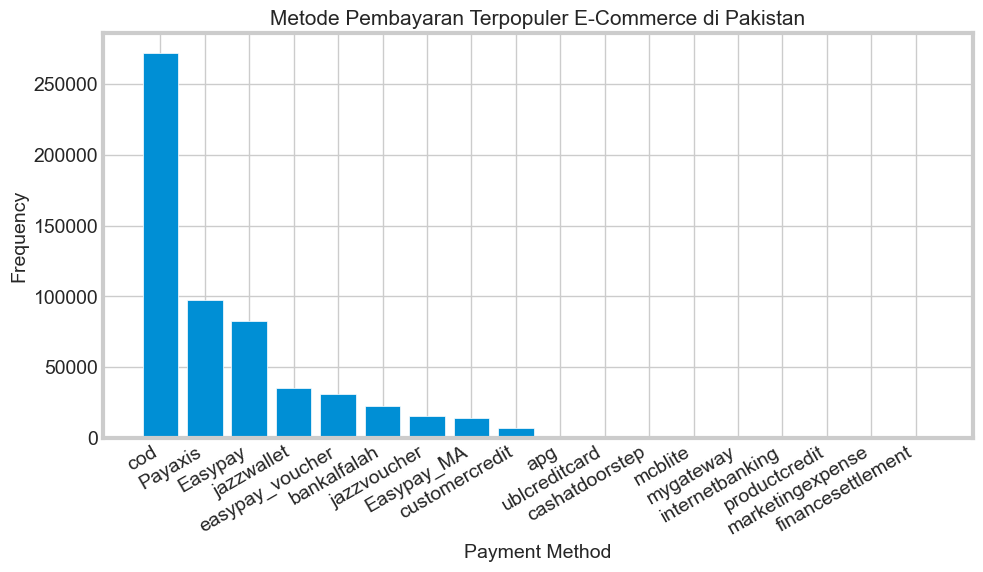

In [365]:
# Count the frequency of each payment method
payment_method_counts = df['Payment Method'].value_counts()

plt.figure(figsize=(10,5))
# Plot the bar chart
plt.bar(payment_method_counts.index, payment_method_counts.values)
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.title('Metode Pembayaran Terpopuler E-Commerce di Pakistan', size='15')
plt.xticks(rotation=30, horizontalalignment='right' )
plt.show()



Dalam penggunaan metode pembayaran yang sering digunakan antara lain:
1. cod
2. Payaxis
3. Easypay
4. Jazzwallet
5. easypay_voucher

dari kelima metode pembayaran tersebut bisa di sipulkan bahwa penggunaan yang paling sering menggunakan E-wallet

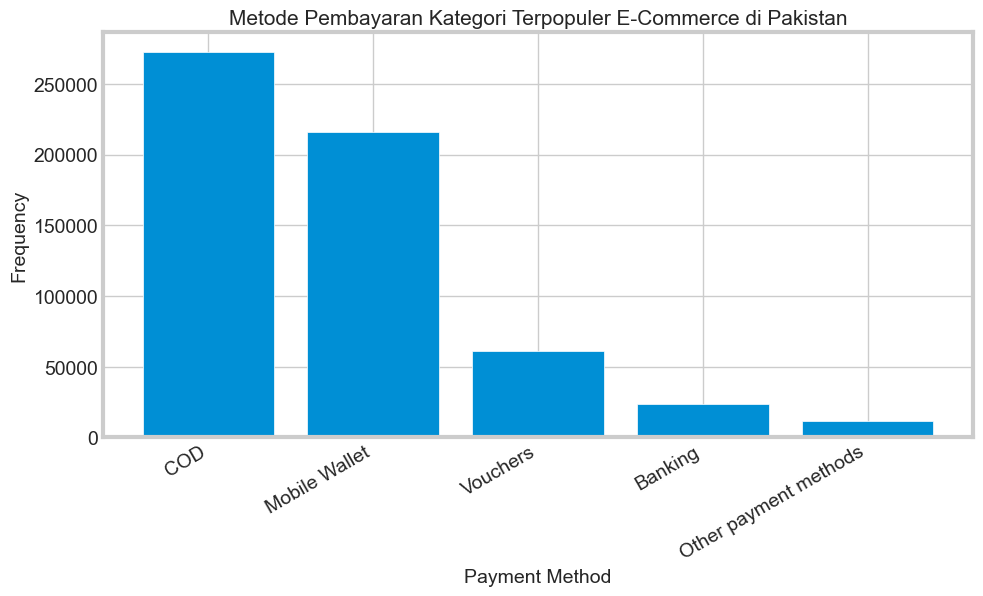

In [366]:
# Count the frequency of each payment method
payment_method_counts = df['Payment Method Category'].value_counts()

plt.figure(figsize=(10,5))
# Plot the bar chart
plt.bar(payment_method_counts.index, payment_method_counts.values)
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.title('Metode Pembayaran Kategori Terpopuler E-Commerce di Pakistan', size='15')
plt.xticks(rotation=30, horizontalalignment='right' )
plt.show()

Berdasarkan diagram pertama metode pembayaran yang populer digunakan oleh masyarakat pakistan adalah menggunakan `COD` dengan jumlah data 271955, lalu pada urutan kedua ada `Payaxis` dengan jumlah data 97637 dan yang ketiga `Easypay` dengan nilai data 82896.<br>
Selanjutnya pada diagram kedua  saya mengkelompokan menjadi beberapa kategori dalam metode pembayaran yang populer digunakan oleh masyarakat pakistan adalah menggunakan `COD` dengan jumlah data 272687, lalu pada urutan kedua ada `Mobile Wallet` dengan jumlah data 215678 dan yang ketiga `Vouchers` dengan nilai data 60836.<br>
Melihat dari diagram diatas bisa ditarik kesimpulan bahwa masyarakat pakistan sudah mulah banyak beralih ke pemabyaran digital yang dimana memiliki keuntungan memungkinkan transaksi keuangan menjadi lebih efisien dan hemat biaya, menwarkan keamanan dan juga memudahkan setiap transaksinya.

### b. Korelasi antara metode pembayaran dengan jumlah pemesanan pertahunnya.

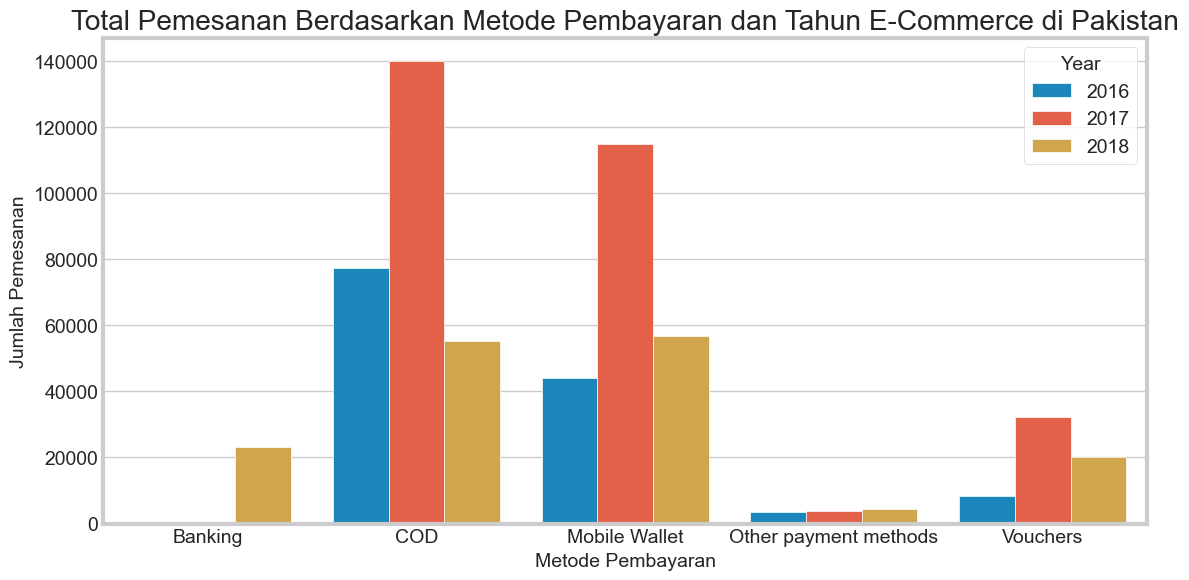

In [367]:
df['Year'] = df['Year'].astype(int)

payment_year = df.groupby(['Payment Method Category', 'Year']).size().reset_index(name='Count')

sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.barplot(x='Payment Method Category', y='Count', hue='Year', data=payment_year)
plt.title('Total Pemesanan Berdasarkan Metode Pembayaran dan Tahun E-Commerce di Pakistan')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Pemesanan')
plt.show()


Pada rentang tahun 2016 sampai 2018 pakistan ternyata memiliki metode pembayaran `COD` yang peningkatanya signifikan pada tahun 2016-2017 lalu mulai menurun pada tahun 2018, berdasarkan pada website ([propakistani](https://propakistani.pk/2018/06/28/95-of-e-commerce-transactions-in-pakistan-are-cash-on-delivery-report/)) menjelasakan faktor yang pada waktu itu banyak masayakarat menggunakan metode `COD` dikarenakan Ketidaktersediaan opsi pembayaran elektronik berarti sebagian besar transaksi e-commerce tetap cash on delivery (COD) — lebih dari 95% di Pakistan. Pakistan menderita kekurangan investasi modal ventura karena tidak adanya ekosistem start-up yang berkembang dengan baik akibatnya tidak memiliki akses ke Paypal atau beberapa layananya.<br> walaupun masalah tersebut memang memprihantinkan tetapi banyak juga masyakarat mungkin yang berada dikotanya sudah banyak menggunakan mobile wallet selain paypal dengan mengalami kenaikan pada tahun 2016-2017 dan penurunan jumlah penggunaan pada tahun 2018 walaupun tidak rendah daripada tahun 2016.

## Saran

5 metode pembayaran dari data asli
- cod
- Payaxis
- Easypay
- Jazzwallet
- easypay_voucher

5 metode pembayaran dari pengkelompokan
- Banking 
- COD
- Mobile Wallet
- Other Payment amthods
- Voucher

5 Total Pemesanan Berdasarkan Metode Pembayaran dan Tahun
- Banking 
- COD
- Mobile Wallet
- Other Payment amthods
- Voucher

Berdasrkan data yang diperoleh bahwa masyarakat pakistan dalam melakukan transaksi E-Commercem yang terbanyak menggunakan metode `COD` dan `Mobile Wallet`.<br>
Mungkin saya ingin menyarankan kepada startup atau penyedia jasa e-commerce dengan lebih menyediakan fitur pembayaran digital, dengan nilai mata uang local dari pada mengambil dari luar negeri yang sangat susah dalam mencari investor asing. Dengan beralihnya metode pembayaran dari `Cash on delivery` ke `E-Wallet` akan membuat proses transaksi menjadi lebih mudah, keamanan akan terjamain, lalu juga dari sisi barang retur akan berkurang dengan metode seperti ini.

## 2. Analsisi Tehadap Data Kategori barang

### a. Lima kategori barang yang terjual banyak

In [357]:
df_complete = df.loc[~df['Status Categorized'].isin(['canceled', 'pending', 'refund'])]

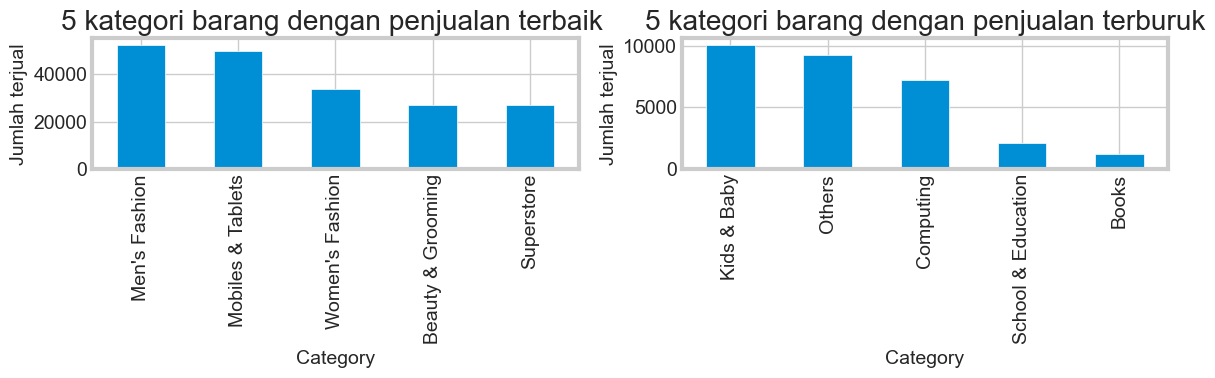

In [369]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
category_counts = df_complete['Category'].value_counts()
top_5_categories = category_counts.head(5)
top_5_categories.plot(kind='bar', ax=axs[0])
axs[0].set_xlabel('Category')
axs[0].set_ylabel('Jumlah terjual')
axs[0].set_title('5 kategori barang dengan penjualan terbaik ')

top_5_badcategories = category_counts.tail(5)
top_5_badcategories.plot(kind='bar', ax=axs[1])
axs[1].set_xlabel('Category')
axs[1].set_ylabel('Jumlah terjual')
axs[1].set_title('5 kategori barang dengan penjualan terburuk')

plt.tight_layout()
plt.show()

In [359]:
# 10 barang paling banyak terjual
most_sold_cat = pd.DataFrame(df.groupby(['SKU', 'Category']).size().reset_index(name = 'Jumlah'))
top_10_most_sold_cat = most_sold_cat.sort_values(by = 'Jumlah', ascending = False).head(10)
top_10_most_sold_cat.columns = ['10 barang paling laris', 'Category', 'Jumlah'] 
top_10_most_sold_cat

,10 barang paling laris,Category,Jumlah
38451,MATSAM59DB75ADB2F80,Mobiles & Tablets,3775
5498,Al Muhafiz Sohan Halwa Almond,Soghaat,2258
75669,emart_00-7,Home & Living,2027
77835,kcc_krone deal,Beauty & Grooming,1894
77043,infinix_Zero 4-Grey,Mobiles & Tablets,1793
38440,MATSAM59DB757FB47A2,Mobiles & Tablets,1273
54978,Rubian_U8 Smart Watch,Mobiles & Tablets,1233
83973,unilever_Deal-6,Superstore,1213
3256,APPNAT5A0A01860CE92,Appliances,1173
38673,MATSAM5A7463EE3C1A5,Mobiles & Tablets,1171


Berdasarakan barplot yang ditapilkan ada beberapa kategori barang dari barang elektronik sampai fashion.

### b. Pembelian terbanyak pada tahun dan juga bulan.

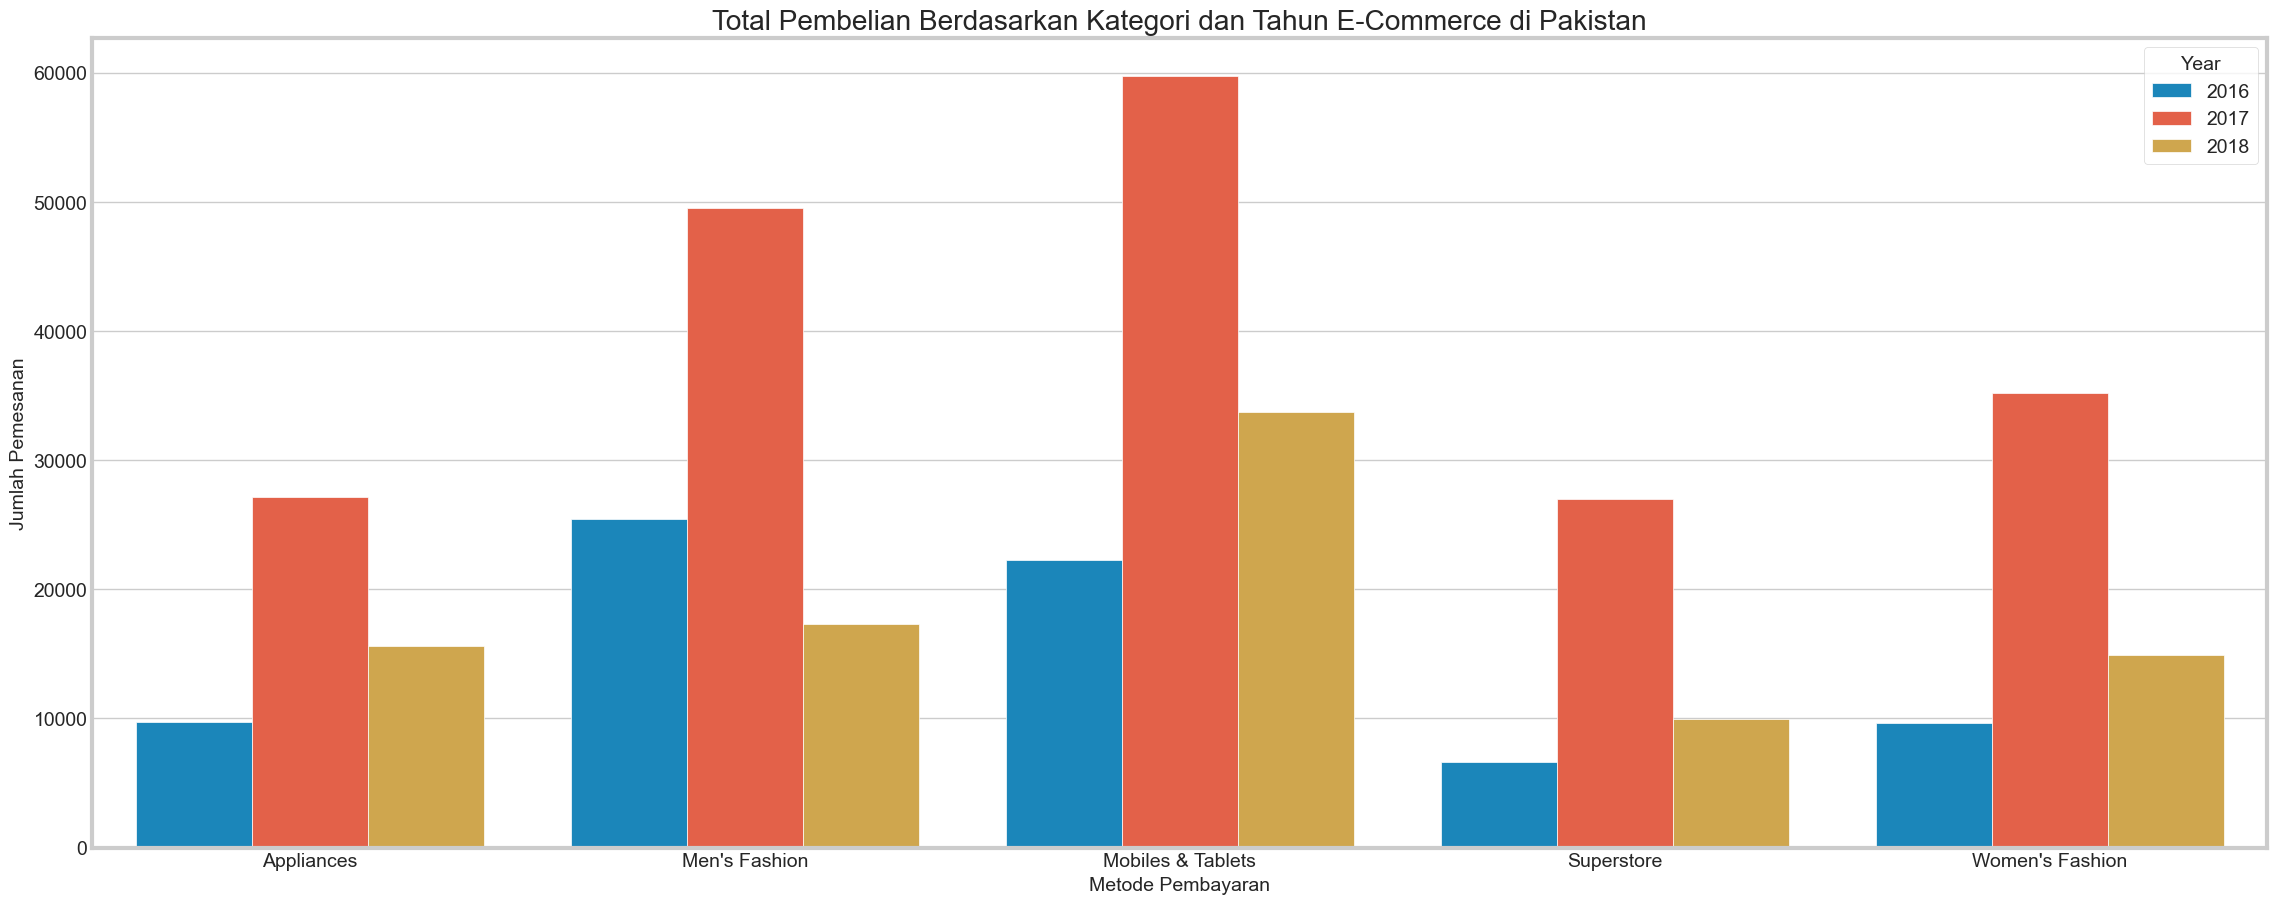

In [370]:
# Mengubah tipe data kolom 'Year' menjadi integer
df['Year'] = df['Year'].astype(int)

# Melakukan grouping berdasarkan 'Category' dan 'Year', kemudian menghitung jumlah data pada setiap grup
payment_year = df.groupby(['Category', 'Year']).size().reset_index(name='Count')

# Sorting data berdasarkan 'Count' secara descending, kemudian mengambil 5 data teratas
top_categories = payment_year.groupby('Category').sum().sort_values('Count', ascending=False).head(5).index
top_payment_year = payment_year[payment_year['Category'].isin(top_categories)]

# Mengatur tampilan plot
sns.set_style('whitegrid')
plt.figure(figsize=(25, 10))

# Membuat plot batang dengan x='Category', y='Count', dan hue='Year' dari data 'top_payment_year'
sns.barplot(x='Category', y='Count', hue='Year', data=top_payment_year)

# Menambahkan judul dan label pada sumbu-X dan sumbu-Y
plt.title('Total Pembelian Berdasarkan Kategori dan Tahun E-Commerce di Pakistan')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Pemesanan')

# Menampilkan plot
plt.show()

Dari barplot diatas menunjukan dari 5 kategori barang yang sering dibeli dari tahun 2016 pembeli sudah mulai membeli lewat e-commerce dan ada peningkatan pada tahun 2017, sayangnya pada tahun 2018 terjadi penurun yang sanagt drastis pada semua aktegori barang

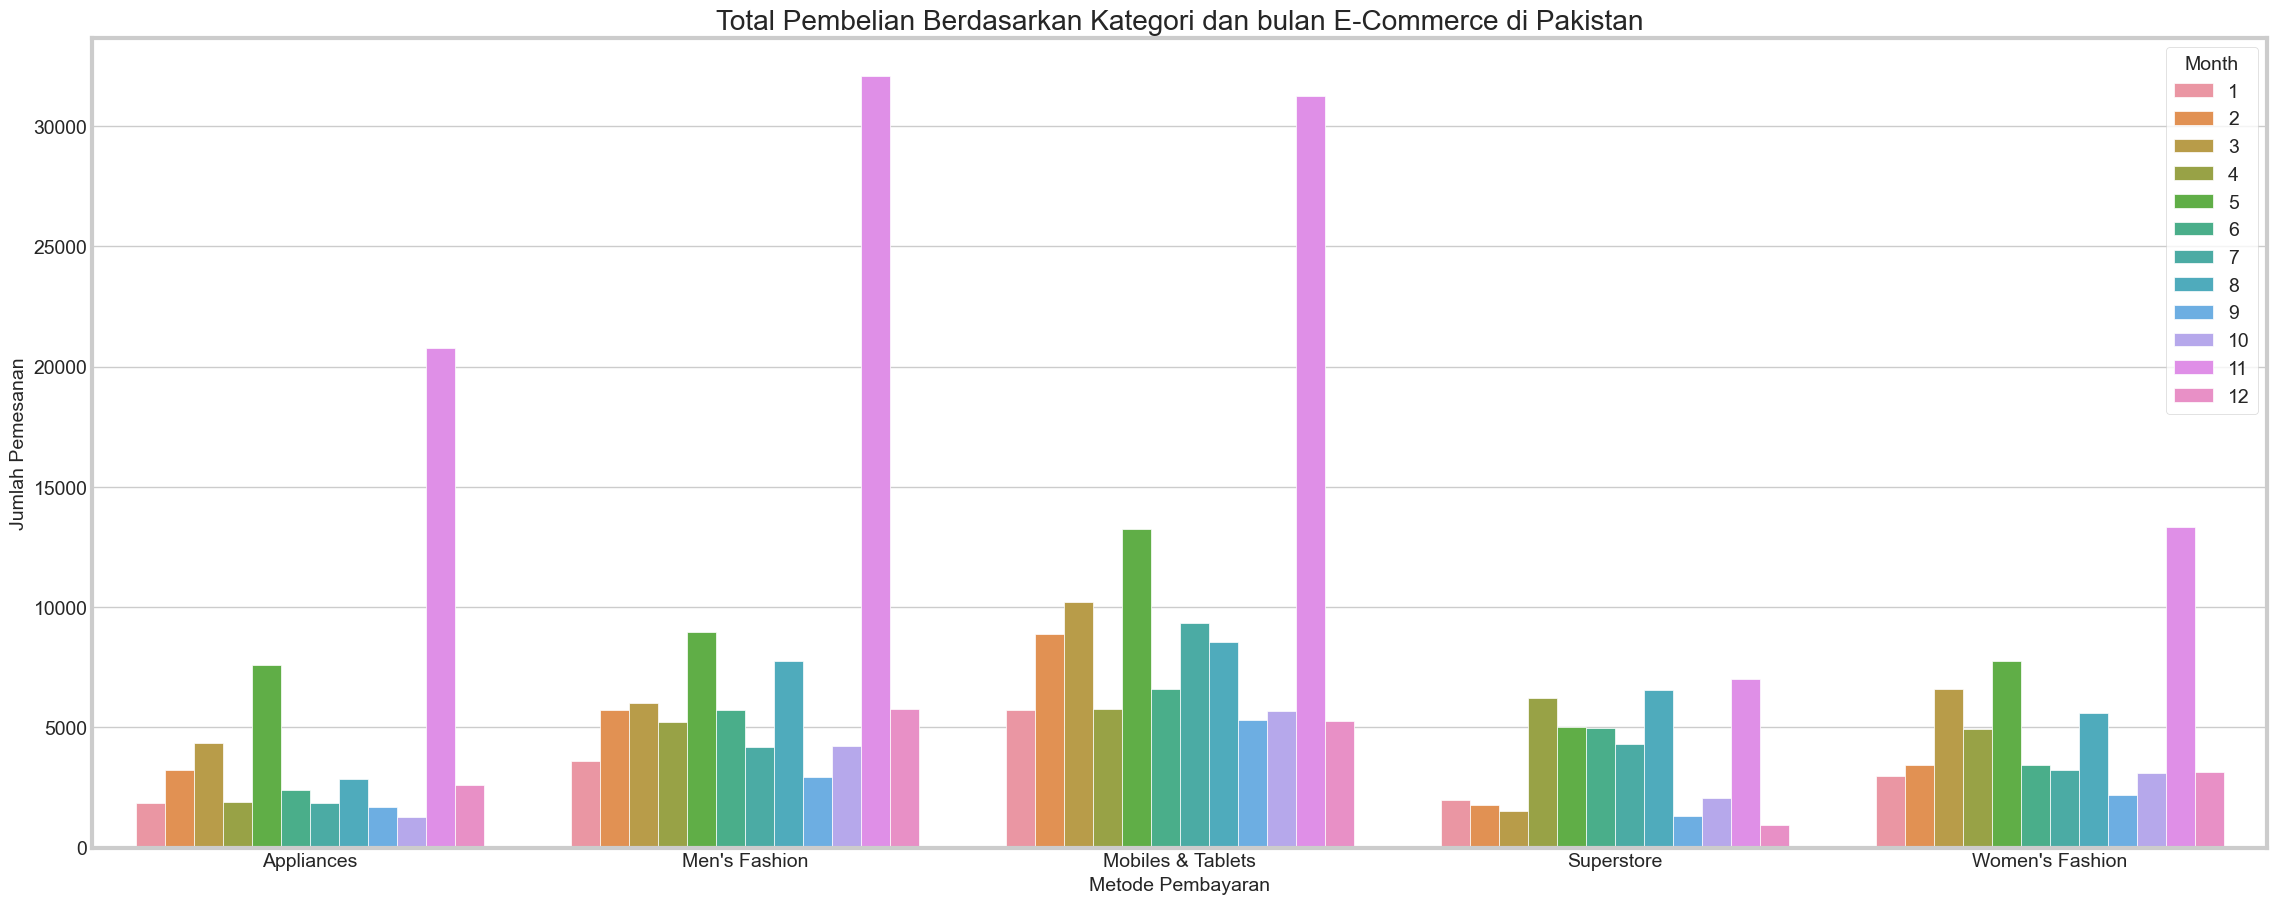

In [371]:
# Mengubah tipe data kolom 'Year' menjadi integer
df['Month'] = df['Month'].astype(int)

# Melakukan grouping berdasarkan 'Category' dan 'Year', kemudian menghitung jumlah data pada setiap grup
payment_year = df.groupby(['Category', 'Month']).size().reset_index(name='Count')

# Sorting data berdasarkan 'Count' secara descending, kemudian mengambil 5 data teratas
top_categories = payment_year.groupby('Category').sum().sort_values('Count', ascending=False).head(5).index
top_payment_year = payment_year[payment_year['Category'].isin(top_categories)]

# Mengatur tampilan plot
sns.set_style('whitegrid')
plt.figure(figsize=(25, 10))

# Membuat plot batang dengan x='Category', y='Count', dan hue='Year' dari data 'top_payment_year'
sns.barplot(x='Category', y='Count', hue='Month', data=top_payment_year)

# Menambahkan judul dan label pada sumbu-X dan sumbu-Y
plt.title('Total Pembelian Berdasarkan Kategori dan bulan E-Commerce di Pakistan')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Pemesanan')

# Menampilkan plot
plt.show()

Dari barplot menunjukan bahwa 5 kategori barang yang sering dibeli pada rentang tahun 2016-2018 pada bulan november peningkatan pembeli sangatlah signifikan.

### c. Pemberian Diskon terbanyak di kategori barang.

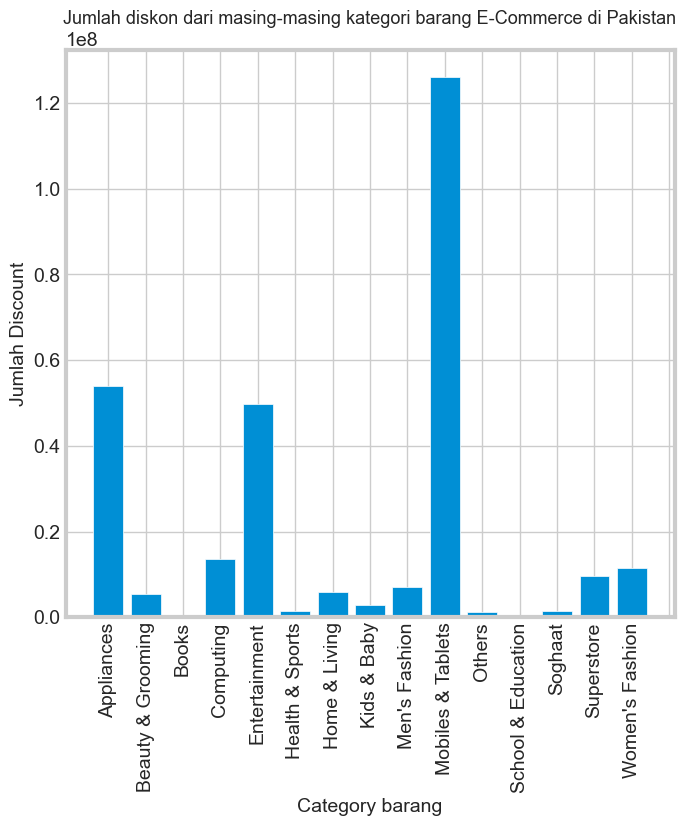

In [372]:
plt.figure(figsize=(7,7))
r= df.groupby('Category')['Discount Amount'].sum()
r=pd.DataFrame(r).reset_index()
plt.bar(r['Category'], r['Discount Amount'])
plt.title('Jumlah diskon dari masing-masing kategori barang E-Commerce di Pakistan', fontsize=13)
plt.xticks(np.arange(16), rotation=90)
plt.xlabel('Category barang')
plt.ylabel('Jumlah Discount')
plt.show()

Jumlah diskont yang terbanyak terdapat pada beberapa kategori yaitu Mobile & Tablets, Appliances, Entertainment, Computing, Womens Fashion


## Saran
5 kategori barang yang berpotensi untuk terjual dengan tinggi
- Men's Fashion
- Mobiles & Tablets
- Women's Fashion
- Beauty & Grooming 
- Superstore

5 Kategori barang yang berpotensi untuk terjual dengan tinggi per tahunya 
- Appliances 
- Men's Fashion
- Mobiles & Tablets
- Women's Fashion
- Superstore

5 Kategori barang yang berpotensi untuk terjual dengan tinggi perbulannya
- Appliances 
- Men's Fashion
- Mobiles & Tablets
- Women's Fashion
- Superstore

5 kategori barang yang diberi diskon tinggi
- Mobiles & Tablets
- Appliances 
- Entertainment
- Computing
- Women's Fashion

Berdasarkan hasil analisis dari dataset  Pakistan Largest Ecommerce, terdapat kategori barang yang disebuah faktor dapat menjadi barang yang akan alris terjual yaitu `Mobiles & Tablets`, `Women's Fashion`, `Men's Fashion`, `Appliances` dan `Superstore`

Untuk klien yang ingin merancang bisnis jual-beli online yang memiliki modal besar namun tidak tahu kategori barang yang akan dijual, kami menyarankan untuk mempertimbangkan memulai bisnis dengan fokus pada salah satu dari 5 kategori barang yang berpotensi untuk terjual dengan tinggi. Ini akan membantu klien meningkatkan peluang keberhasilannya dalam bisnis tersebut.